In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import geopandas as gpd
from mpl_toolkits.axes_grid1 import make_axes_locatable

%config InlineBackend.figure_format = 'retina'

In [2]:
df = pd.read_csv('goodnames_af_food_trade.csv')

#Import shp file of the world and ignore Antarctica
world = gpd.read_file('world_shapefiles/Longitude_Graticules_and_World_Countries_Boundaries-shp/99bfd9e7-bb42-4728-87b5-07f8c8ac631c2020328-1-1vef4ev.lu5nk.shp')
world = world[world.CNTRY_NAME !='Antarctica']


#Filter equal country names
cont=set(df.name).intersection(world.CNTRY_NAME)
antdf=df[df['name'].apply(lambda country: str(country) in cont)]
world=world[world['CNTRY_NAME'].apply(lambda country: str(country) in cont)]

#sort by country names.
sort_antdf =  antdf.sort_values(by=['name']).reset_index(drop=True)
sort_world=world.sort_values(by=['CNTRY_NAME']).reset_index(drop=True)

#check for equality
sort_antdf['name'].equals(sort_world['CNTRY_NAME'])

True

In [3]:
antdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 209 entries, 0 to 243
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       209 non-null    object 
 1   af_in_pr   163 non-null    float64
 2   af_in_vl   163 non-null    float64
 3   af_ex_pr   185 non-null    float64
 4   af_ex_vl   186 non-null    float64
 5   af_in_pr2  163 non-null    float64
 6   af_in_vl2  163 non-null    float64
 7   af_ex_pr2  185 non-null    float64
 8   af_ex_vl2  186 non-null    float64
dtypes: float64(8), object(1)
memory usage: 16.3+ KB


In [5]:
gpd.__version__

'0.6.1'

Text(0.5, 1.0, "Exporter's Antifragility-pr")

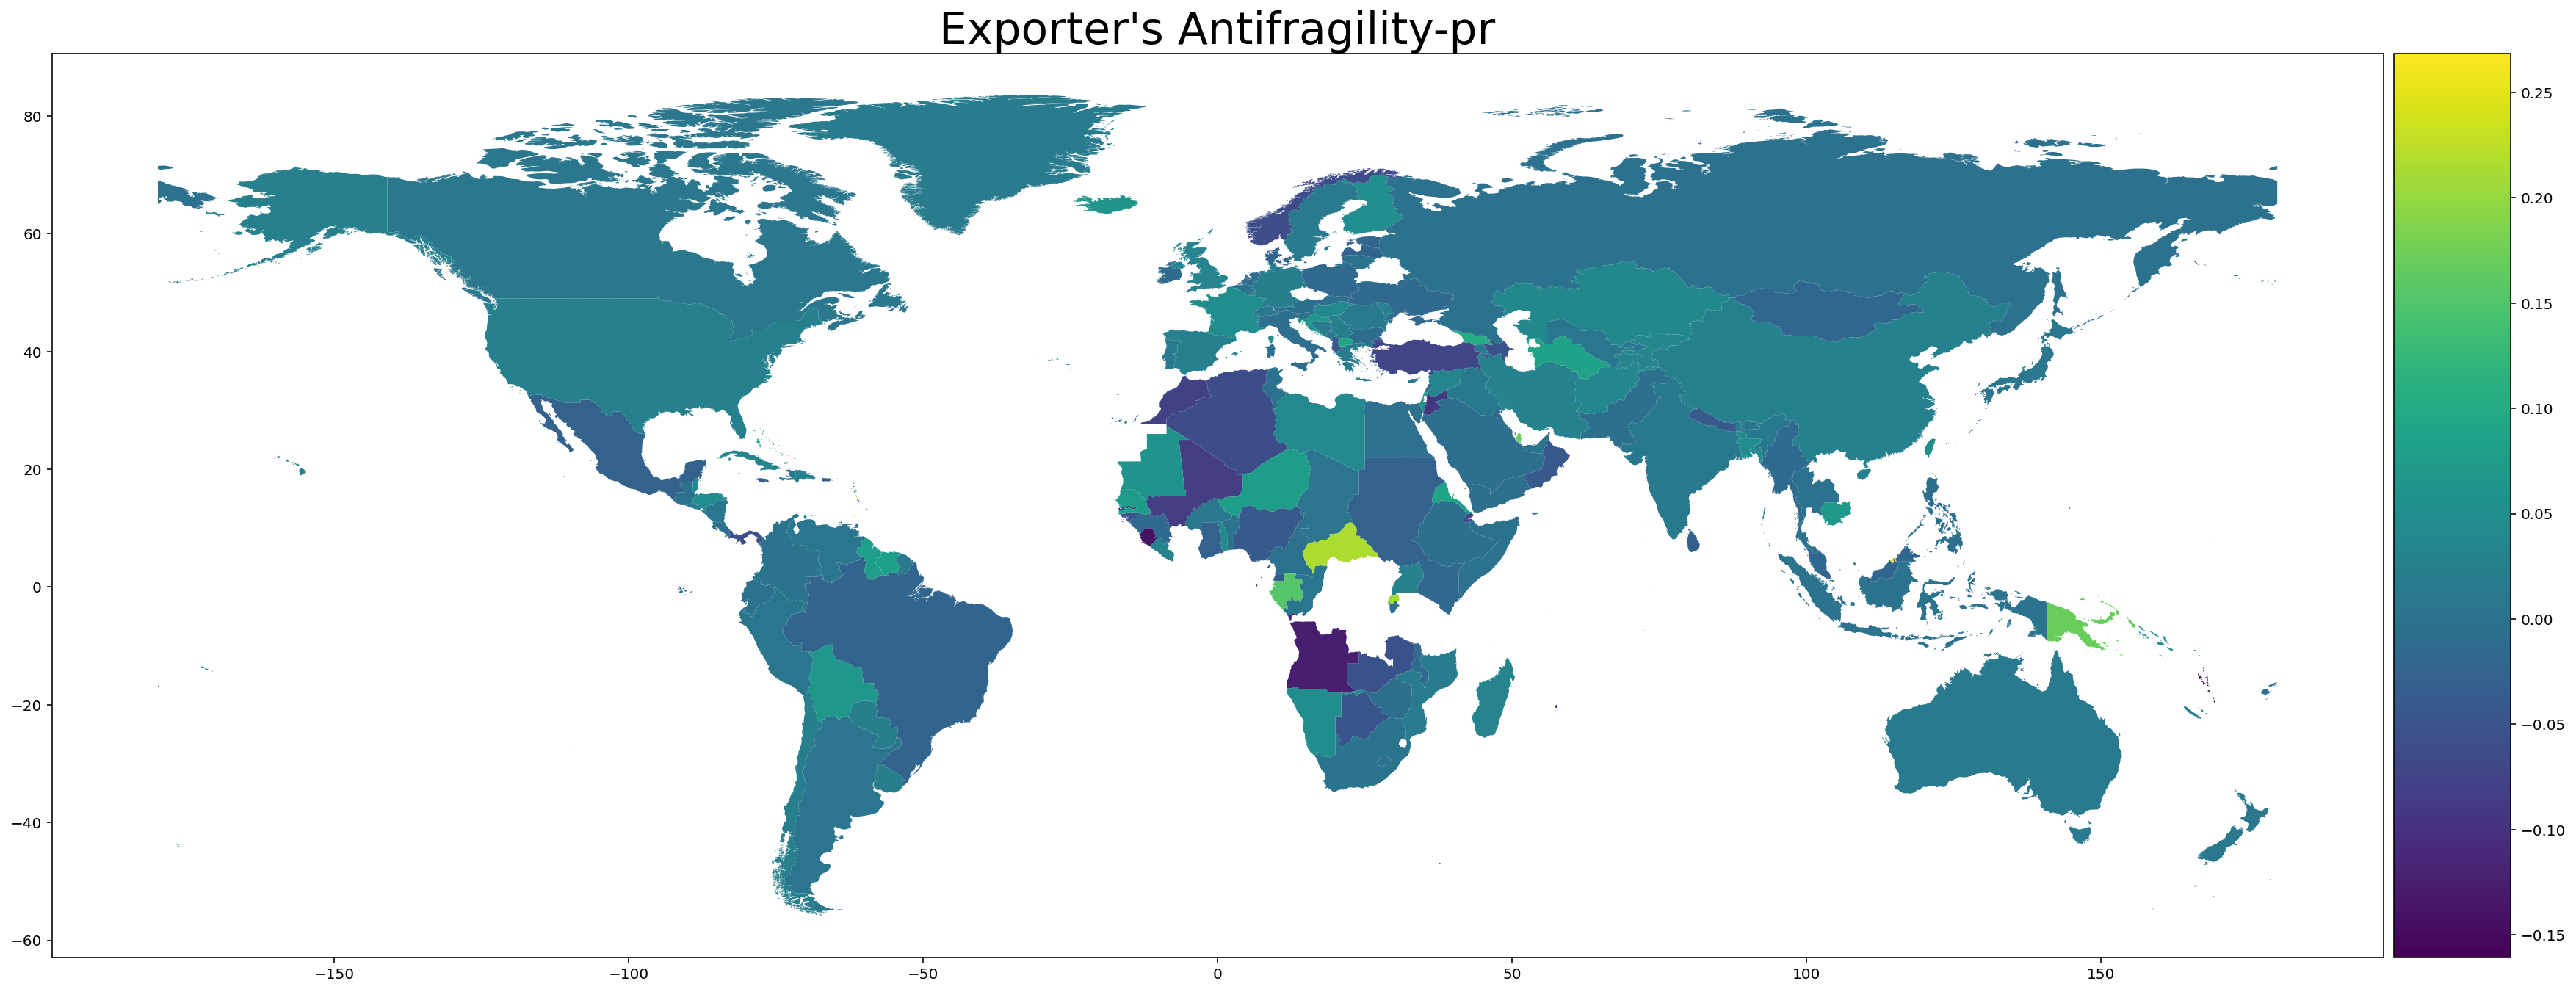

In [9]:
antifrag = 'af_ex_vl'
sort_world[antifrag]=sort_antdf[antifrag]

fig,ax = plt.subplots(1,1,figsize=(30,20))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right",size="5%",pad=0.1)

sort_world.plot(column=antifrag,ax=ax,legend=True,cax=cax)
ax.set_title('Exporter\'s Antifragility-pr',fontsize=30)
# plt.savefig('Map_antifragility_v1')

In [46]:
sort_world.head(40)

,OBJECTID,CNTRY_NAME,geometry,af_ex_pr
0,3,Afghanistan,"POLYGON ((61.27656 35.60725, 61.29638 35.62853...",0.032854
1,6,Albania,"POLYGON ((20.79192 40.43154, 20.78722 40.39472...",0.043430
2,4,Algeria,"POLYGON ((-5.15213 30.18047, -5.13917 30.19236...",-0.019265
3,10,American Samoa,"POLYGON ((-170.74390 -14.37556, -170.74942 -14...",-0.005977
4,8,Andorra,"POLYGON ((1.44583 42.60194, 1.48653 42.65041, ...",-0.029022
5,9,Angola,"MULTIPOLYGON (((13.09139 -4.63306, 13.09264 -4...",-0.050792
6,14,Anguilla,"POLYGON ((-63.16778 18.16444, -63.15695 18.177...",NaN
7,2,Antigua and Barbuda,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ...",-0.015005
8,11,Argentina,"MULTIPOLYGON (((-71.01648 -36.47591, -70.98195...",-0.004908
9,7,Armenia,"MULTIPOLYGON (((45.52888 40.60610, 45.50610 40...",0.179303


### Replace names to match both datasets

In [3]:
df = pd.read_csv("af_food_trade.csv") 
df=df.rename(columns={'Unnamed: 0':'name'})

world = gpd.read_file('world_shapefiles/Longitude_Graticules_and_World_Countries_Boundaries-shp/99bfd9e7-bb42-4728-87b5-07f8c8ac631c2020328-1-1vef4ev.lu5nk.shp')

cont=set(df.name).intersection(world.CNTRY_NAME)

In [5]:
df.af_in_pr

0     -0.013992
1     -0.007914
2      0.014725
3      0.034908
4      0.020205
         ...   
239         NaN
240         NaN
241         NaN
242         NaN
243         NaN
Name: af_in_pr, Length: 244, dtype: float64

In [313]:
comparar1=set(df.name)-set(cont)

In [294]:
comparar2=set(world.CNTRY_NAME.unique())-set(df.name.unique())

In [295]:
listadf_arenombrar = list(comparar1)

In [296]:
listacomparar = list(comparar2)

In [ ]:
# oldnew={}
for country in listacomparar:
    for extract_count in listadf_arenombrar:
        if extract_count.find(country) != -1 or country.find(extract_count) !=-1:
            print(extract_count, '------',country)
            oldnew[extract_count] = country

In [298]:
oldnew = {'Samoa': 'Western Samoa',
 'Myanmar': 'Myanmar (Burma)',
 'United States Virgin Islands': 'Virgin Islands',
 'Brunei Darussalam': 'Brunei',
 'China, mainland': 'China',
 'China, Taiwan Province of': 'Taiwan',
 'Gambia': 'Gambia, The',
 'Syrian Arab Republic': 'Syria',
 'Palau': 'Pacific Islands (Palau)',
 'North Macedonia': 'Macedonia',
 'Iran (Islamic Republic of)': 'Iran',
 'Midway Island': 'Midway Islands',
 'Republic of Moldova': 'Moldova',
 'Bahamas': 'Bahamas, The',
 'Bolivia (Plurinational State of)': 'Bolivia',
 'Russian Federation': 'Russia',
 'Wallis and Futuna Islands': 'Wallis and Futuna',
 'United States of America': 'United States',
 'Netherlands Antilles (former)': 'Netherlands Antilles',
 'Venezuela (Bolivarian Republic of)': 'Venezuela'}

In [301]:
df['name']=df['name'].replace(oldnew)

In [311]:
df.to_csv('goodnames_af_food_trade.csv',index=False)